<center><b><font size="5"><div style="background-color: yellow; color: darkgrey;">DATA EXPLORATION</center></b></font></div>

<center><b><font size="3"><div style="background: linear-gradient(to right, white, black); padding: 10px;">Importing libraries and datasets</center></b></font></div>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,LinearRegression
import itertools
import gc
import os
import sys
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet

####

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier




## For model selection and cross validation.
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn import metrics

### Ussed for encoding and feature engineering. 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [4]:
import wget

In [5]:
url1 = 'https://www.dropbox.com/s/brixkogrmhan6ed/cab_rides.csv'
output_filename1 = 'cab_rides.csv'

wget.download(url1, out=output_filename1)

-1 / unknown

'cab_rides (3).csv'

In [6]:
url2 = 'https://www.dropbox.com/s/ncqb2ctkg7da11k/weather.csv'
output_filename2 = 'weather.csv'

wget.download(url2, out=output_filename2)

-1 / unknown

'weather (3).csv'

In [7]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [8]:
cab_data = pd.read_csv(r"C:\Users\Manu Tomar\Downloads\cab_rides.csv" , sep = ",")
cab_data=reduce_mem_usage(cab_data)
weather_data = pd.read_csv(r"C:\Users\Manu Tomar\Downloads\weather.csv" , sep = ",")
weather_data=reduce_mem_usage(weather_data)

Memory usage of dataframe is 52.88 MB --> 44.95 MB (Decreased by 15.0%)
Memory usage of dataframe is 0.38 MB --> 0.22 MB (Decreased by 43.7%)


In [9]:
cab_data.shape

(693071, 10)

In [10]:
weather_data.shape

(6276, 8)

In [11]:
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [12]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float32
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float32
 6   surge_multiplier  693071 non-null  float32
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float32(3), int64(1), object(6)
memory usage: 44.9+ MB


In [13]:
cab_data.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [14]:
cab_data.dropna(subset=['price'], inplace=True)
cab_data.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

In [15]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float32
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float32
 3   pressure    6276 non-null   float32
 4   rain        894 non-null    float32
 5   time_stamp  6276 non-null   int32  
 6   humidity    6276 non-null   float32
 7   wind        6276 non-null   float32
dtypes: float32(6), int32(1), object(1)
memory usage: 220.8+ KB


In [16]:
weather_data.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [17]:
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.419998,Back Bay,1.0,1012.140015,0.1228,1545003901,0.77,11.25
1,42.430000,Beacon Hill,1.0,1012.150024,0.1846,1545003901,0.76,11.32
2,42.500000,Boston University,1.0,1012.150024,0.1089,1545003901,0.76,11.07
3,42.110001,Fenway,1.0,1012.130005,0.0969,1545003901,0.77,11.09
4,43.130001,Financial District,1.0,1012.140015,0.1786,1545003901,0.75,11.49


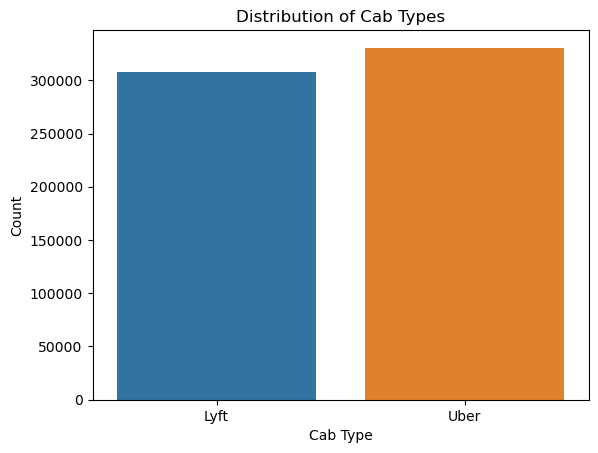

In [18]:
ax = sns.countplot(data=cab_data, x='cab_type')
ax.set_title('Distribution of Cab Types')
ax.set_xlabel('Cab Type')
ax.set_ylabel('Count')
plt.show()

<b>Observation: Since only Uber Cars are the subject of our study and forecast, we only choose Uber and disregard the rest.</b>

Our analysis and prediction is on Uber Cars only therefore we select only uber and drop rest.

In [19]:
cab_data = cab_data.loc[cab_data['cab_type'] == 'Uber']

We drop the rain column because the entire year saw no rain. Consequently, it lacks values. To prevent prediction errors, we eliminate it.

In [20]:
weather_data = weather_data.drop('rain', 1)

In [21]:
# timeStamp to Date time format for better analysis and modeling
from datetime import datetime, date
cab_data['datetime']=pd.to_datetime(cab_data['time_stamp'],unit='ms', infer_datetime_format=True)
weather_data['date_time']=pd.to_datetime(weather_data['time_stamp'],unit='s',infer_datetime_format=True)

In [22]:
cab_data['Udate'] = cab_data.datetime.dt.date
weather_data['Wdate'] = weather_data.date_time.dt.date

In [23]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,330568.000000,3.305680e+05,330568.000000,330568.0
mean,2.192275,1.544046e+12,15.795343,1.0
std,1.178892,6.897122e+08,8.558564,0.0
min,0.020000,1.543204e+12,4.500000,1.0
25%,1.300000,1.543444e+12,9.000000,1.0
50%,2.170000,1.543737e+12,12.500000,1.0
75%,2.840000,1.544828e+12,21.500000,1.0
max,7.860000,1.545161e+12,89.500000,1.0


In [24]:
weather_data.describe()

,temp,clouds,pressure,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090378,0.677775,1008.443176,1.543857e+09,0.763976,6.802810
std,6.022061,0.314283,12.870790,6.659340e+05,0.127340,3.633476
min,19.620001,0.000000,988.250000,1.543204e+09,0.450000,0.290000
25%,36.077501,0.440000,997.747498,1.543387e+09,0.670000,3.517500
50%,40.130001,0.780000,1007.659973,1.543514e+09,0.760000,6.570000
75%,42.832501,0.970000,1018.479980,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.119995,1.545159e+09,0.990000,18.180000


In [25]:
weather_data.loc[0:50,]

,temp,location,clouds,pressure,time_stamp,humidity,wind,date_time,Wdate
0,42.419998,Back Bay,1.00,1012.140015,1545003901,0.77,11.25,2018-12-16 23:45:01,2018-12-16
1,42.430000,Beacon Hill,1.00,1012.150024,1545003901,0.76,11.32,2018-12-16 23:45:01,2018-12-16
2,42.500000,Boston University,1.00,1012.150024,1545003901,0.76,11.07,2018-12-16 23:45:01,2018-12-16
3,42.110001,Fenway,1.00,1012.130005,1545003901,0.77,11.09,2018-12-16 23:45:01,2018-12-16
4,43.130001,Financial District,1.00,1012.140015,1545003901,0.75,11.49,2018-12-16 23:45:01,2018-12-16
5,42.340000,Haymarket Square,1.00,1012.150024,1545003901,0.77,11.49,2018-12-16 23:45:01,2018-12-16
6,42.360001,North End,1.00,1012.150024,1545003901,0.77,11.46,2018-12-16 23:45:01,2018-12-16
7,42.209999,North Station,1.00,1012.159973,1545003901,0.77,11.37,2018-12-16 23:45:01,2018-12-16
8,42.070000,Northeastern University,1.00,1012.119995,1545003901,0.78,11.28,2018-12-16 23:45:01,2018-12-16
9,43.049999,South Station,1.00,1012.119995,1545003901,0.75,11.58,2018-12-16 23:45:01,2018-12-16


<center><b><font size="3"><div style="background: linear-gradient(to right, white, black); padding: 10px;">Merging both datasets</center></b></font></div>

In [26]:
cab_data_Temp = cab_data.sample(n = 25000, random_state = 12345) ### As the data is too much we work on only 25000 records

## Concatinating two datasets into one for modeling.

cabWeather = pd.merge(cab_data_Temp, weather_data, how='inner', left_on=['Udate','destination'], right_on=['Wdate','location'])

In [27]:
cabWeather.shape

(966161, 21)

In [28]:
cabWeather.head()

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,...,Udate,temp,location,clouds,pressure,time_stamp_y,humidity,wind,date_time,Wdate
0,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,2018-12-04,45.889999,South Station,0.04,1003.200012,1543888374,0.60,7.75,2018-12-04 01:52:54,2018-12-04
1,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,2018-12-04,45.070000,South Station,0.25,1003.169983,1543891974,0.62,8.44,2018-12-04 02:52:54,2018-12-04
2,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,2018-12-04,39.869999,South Station,0.56,1004.450012,1543902774,0.64,8.21,2018-12-04 05:52:54,2018-12-04
3,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,2018-12-04,44.029999,South Station,0.53,1003.150024,1543895574,0.62,7.36,2018-12-04 03:52:54,2018-12-04
4,0.55,Uber,1543896180749,South Station,Theatre District,27.5,1.0,e0369d75-66a0-4b92-8cb6-877c0fe831b7,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,2018-12-04,41.849998,South Station,0.52,1003.929993,1543899174,0.63,8.05,2018-12-04 04:52:54,2018-12-04


In [29]:
cabWeather.isnull().sum()

distance            0
cab_type            0
time_stamp_x        0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
datetime            0
Udate               0
temp                0
location            0
clouds              0
pressure            0
time_stamp_y        0
humidity            0
wind                0
date_time           0
Wdate               0
dtype: int64

<center><b><font size="3"><div style="background: linear-gradient(to right, white, black); padding: 10px;">Feature Engineering</center></b></font></div>

In [30]:
cabWeather['Wweek']=cabWeather.date_time.dt.day_of_week
cabWeather['Whour']=cabWeather.date_time.dt.hour

In [31]:
cabWeather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966161 entries, 0 to 966160
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          966161 non-null  float32       
 1   cab_type          966161 non-null  object        
 2   time_stamp_x      966161 non-null  int64         
 3   destination       966161 non-null  object        
 4   source            966161 non-null  object        
 5   price             966161 non-null  float32       
 6   surge_multiplier  966161 non-null  float32       
 7   id                966161 non-null  object        
 8   product_id        966161 non-null  object        
 9   name              966161 non-null  object        
 10  datetime          966161 non-null  datetime64[ns]
 11  Udate             966161 non-null  object        
 12  temp              966161 non-null  float32       
 13  location          966161 non-null  object        
 14  clou

In [32]:
cabWeather.surge_multiplier = pd.to_numeric(cabWeather.surge_multiplier)

<AxesSubplot:>

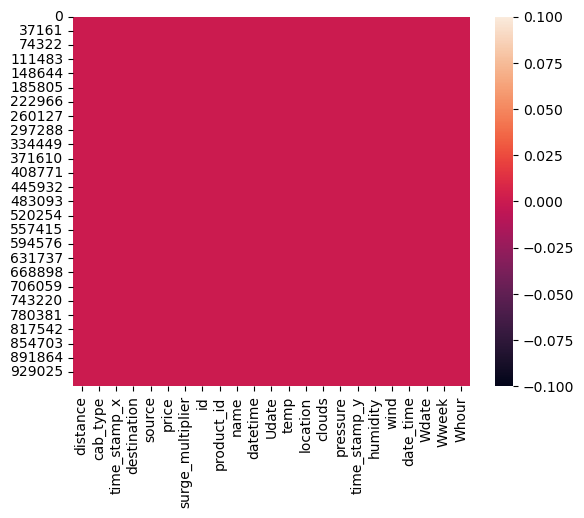

In [33]:
sns.heatmap(cabWeather.isnull())

In [34]:
cabWeather.fillna(0,inplace=True)

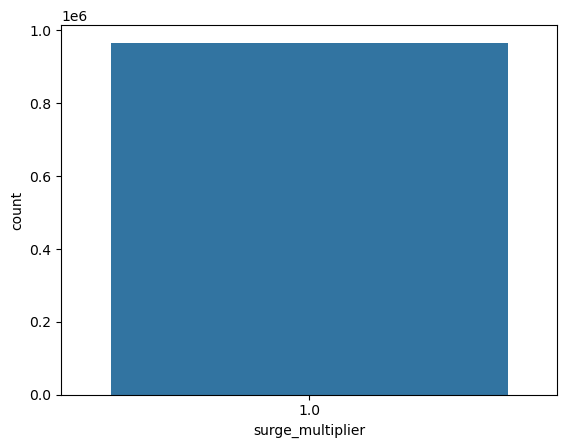

In [35]:
ax = sns.countplot(data=cabWeather, x='surge_multiplier')

In [36]:
cabWeather.columns

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'datetime',
       'Udate', 'temp', 'location', 'clouds', 'pressure', 'time_stamp_y',
       'humidity', 'wind', 'date_time', 'Wdate', 'Wweek', 'Whour'],
      dtype='object')

In [37]:
cabWeather.groupby('cab_type').count()

,distance,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,datetime,...,location,clouds,pressure,time_stamp_y,humidity,wind,date_time,Wdate,Wweek,Whour
cab_type,,,,,,,,,,,,,,,,,,,,,
Uber,966161,966161,966161,966161,966161,966161,966161,966161,966161,966161,...,966161,966161,966161,966161,966161,966161,966161,966161,966161,966161


<center><b><font size="3"><div style="background: linear-gradient(to right, white, black); padding: 10px;">Explotary Data Analysis with final dataset</center></b></font></div>

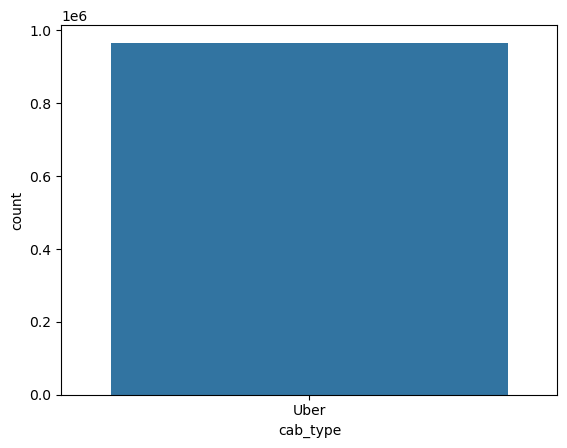

In [38]:
ax = sns.countplot(data=cabWeather, x='cab_type')

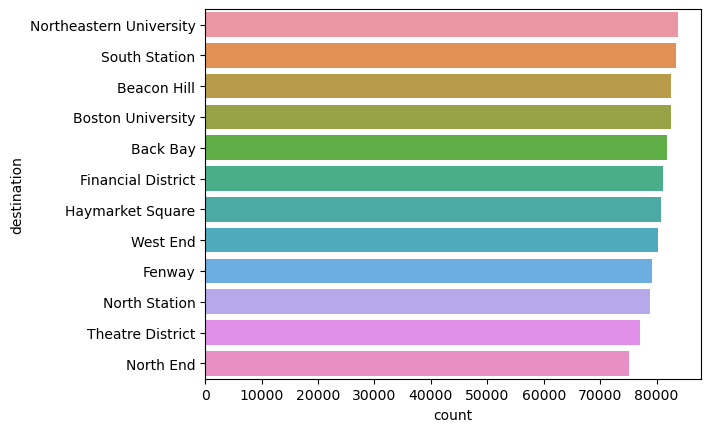

In [39]:
ax = sns.countplot(data=cabWeather, y='destination', order = cabWeather.destination.value_counts().index)

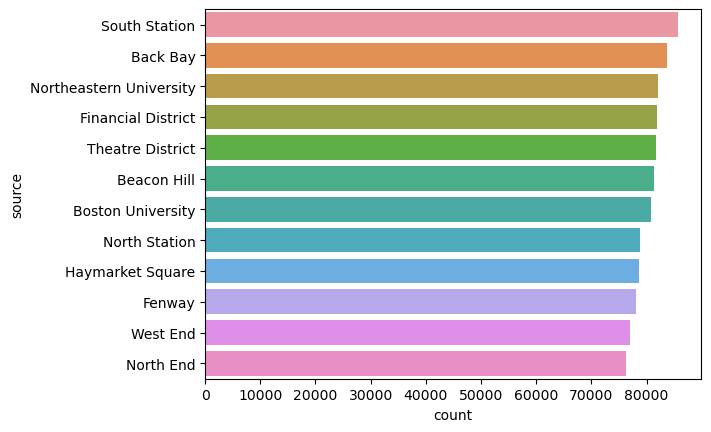

In [40]:
ax = sns.countplot(data=cabWeather, y='source', order = cabWeather.source.value_counts().index)

<Figure size 700x700 with 0 Axes>

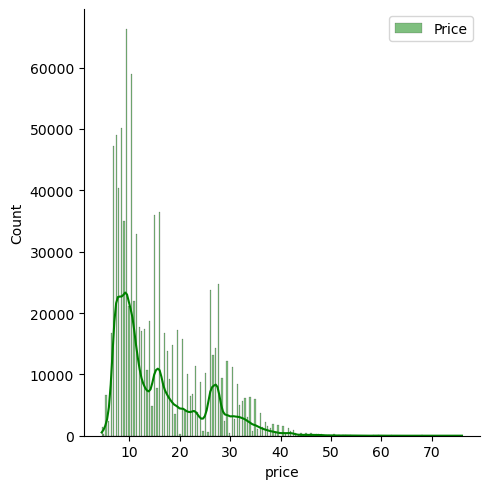

In [41]:
fig = plt.figure(figsize=(7,7))
sns.displot(cabWeather.price, color='green',label='Price', kde=True)
plt.legend()

<Figure size 700x700 with 0 Axes>

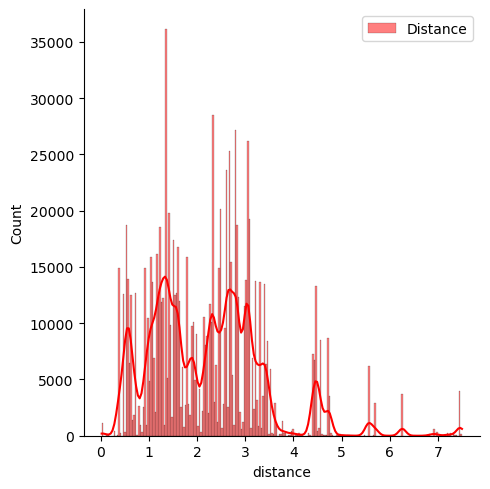

In [42]:
fig = plt.figure(figsize=(7,7))
sns.displot(cabWeather.distance, color='red',label='Distance', kde=True)
plt.legend()

<Figure size 700x700 with 0 Axes>

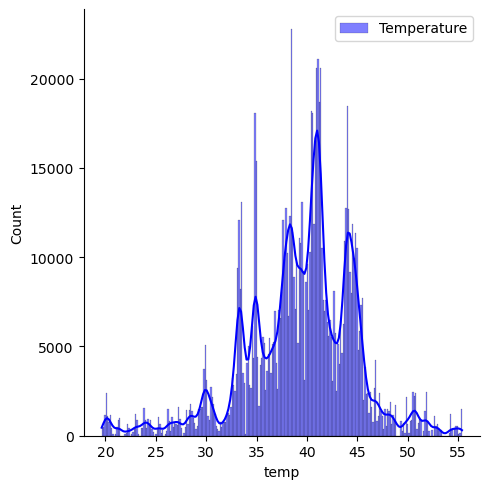

In [43]:
fig = plt.figure(figsize=(7,7))
sns.displot(cabWeather.temp, color='blue',label='Temperature', kde=True)
plt.legend()

<Figure size 700x700 with 0 Axes>

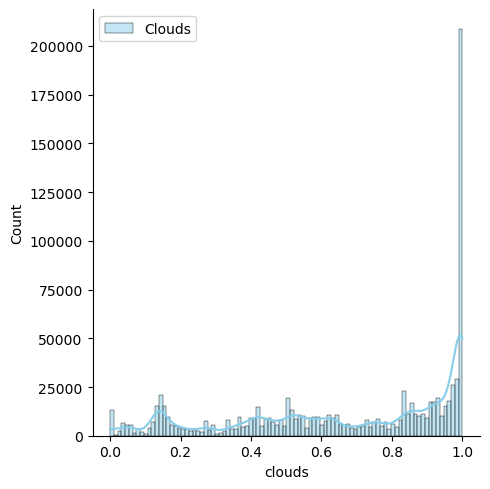

In [44]:
fig = plt.figure(figsize=(7,7))
sns.displot(cabWeather.clouds, color='Skyblue',label='Clouds', kde=True)
plt.legend()

<Figure size 700x700 with 0 Axes>

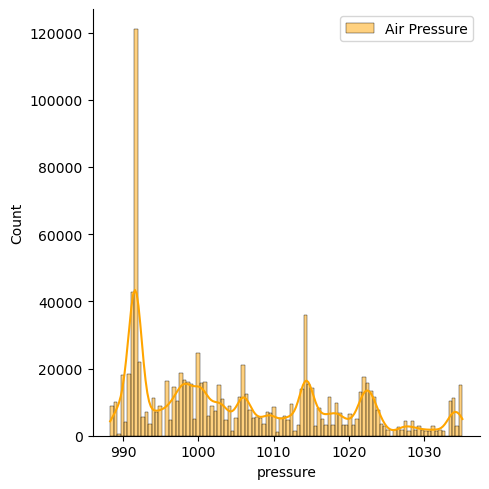

In [45]:
fig = plt.figure(figsize=(7,7))
sns.displot(cabWeather.pressure, color='orange',label='Air Pressure', kde=True)
plt.legend()

<Figure size 700x700 with 0 Axes>

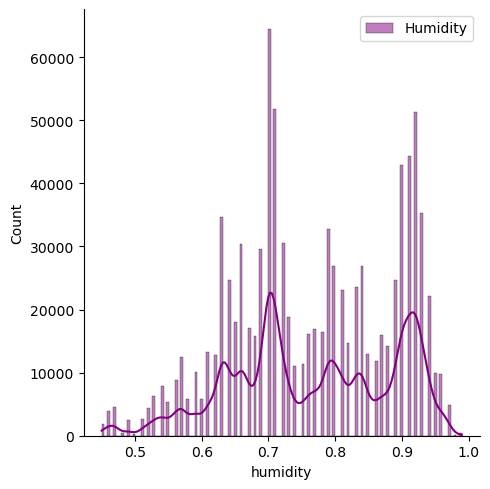

In [46]:
fig = plt.figure(figsize=(7,7))
sns.displot(cabWeather.humidity, color='purple',label='Humidity', kde=True)
plt.legend()

<Figure size 700x700 with 0 Axes>

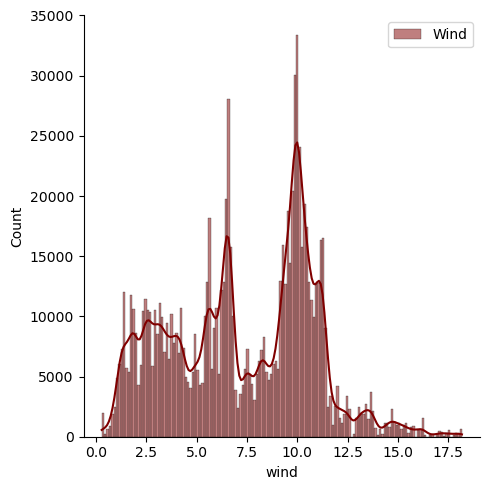

In [47]:
fig = plt.figure(figsize=(7,7))
sns.displot(cabWeather.wind, color='maroon',label='Wind', kde=True)
plt.legend()

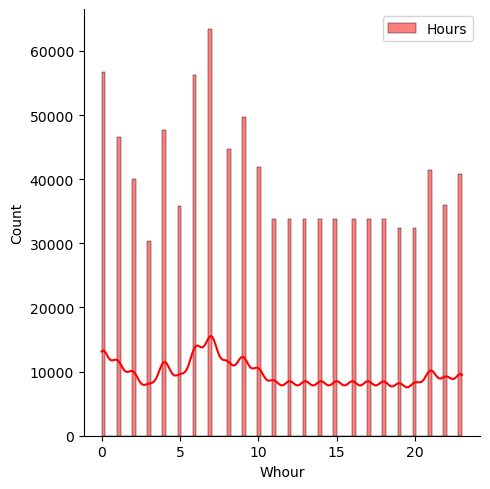

In [48]:
sns.displot(cabWeather.Whour, color='red',label='Hours', kde=True)
plt.legend()

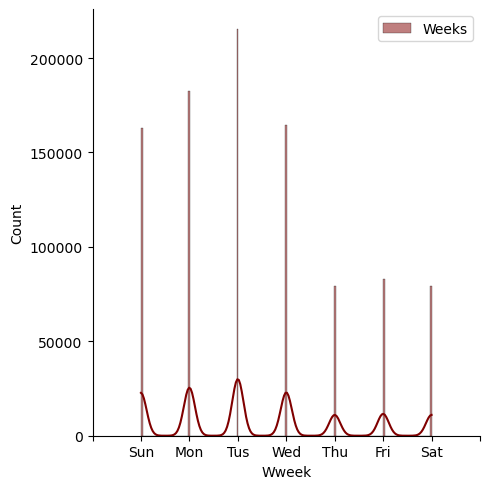

In [49]:
s = sns.displot(cabWeather.Wweek, color='maroon',label='Weeks', kde=True) 
s.set_xticklabels(['','Sun','Mon','Tus','Wed','Thu','Fri','Sat',''])
plt.legend()

<AxesSubplot:xlabel='Whour', ylabel='price'>

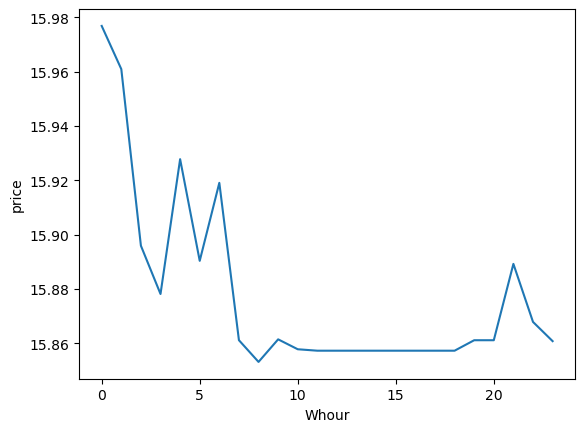

In [74]:
sns.lineplot(data=cabWeather, x="Whour", y="price", estimator="mean", ci=None)

<AxesSubplot:xlabel='Wweek', ylabel='price'>

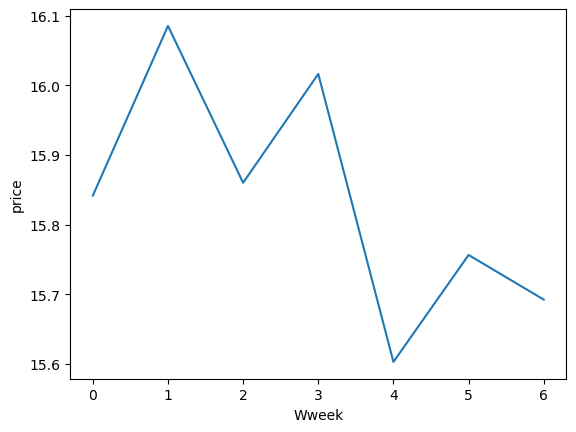

In [77]:
sns.lineplot(data=cabWeather, x="Wweek", y="price", estimator="mean", ci=None)

<AxesSubplot:xlabel='distance', ylabel='price'>

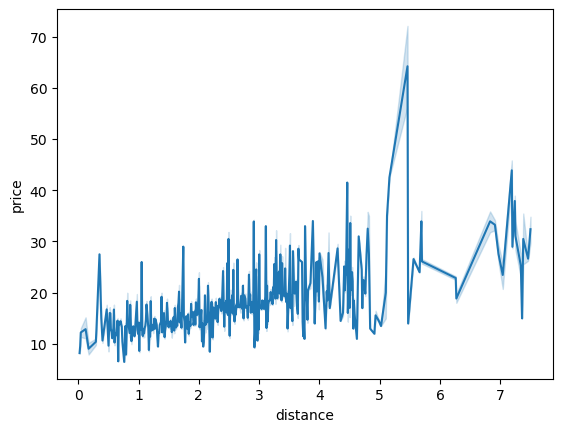

In [82]:
sns.lineplot(data=cabWeather, x="distance", y="price")

<AxesSubplot:xlabel='temp', ylabel='price'>

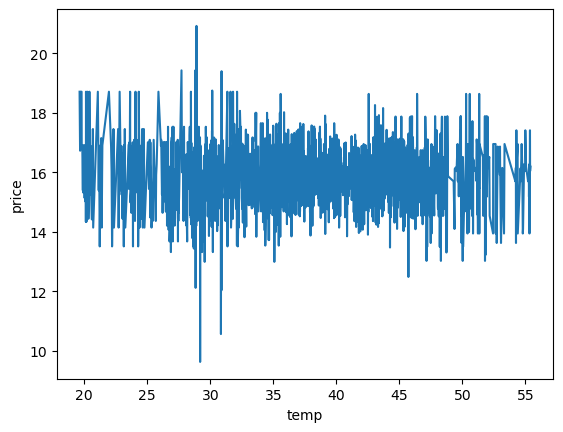

In [83]:
sns.lineplot(data=cabWeather, x="temp", y="price", estimator="mean", ci=None)

<AxesSubplot:xlabel='clouds', ylabel='price'>

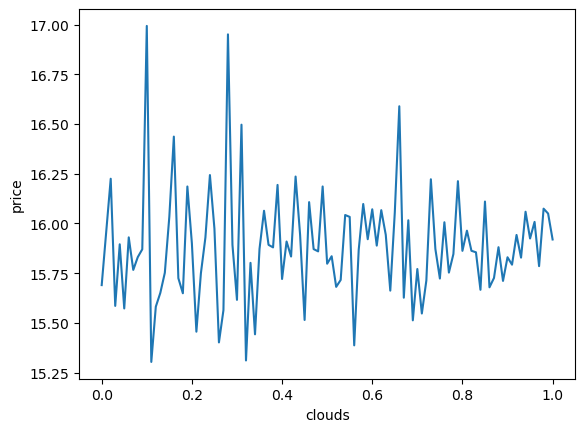

In [84]:
sns.lineplot(data=cabWeather, x="clouds", y="price", estimator="mean", ci=None)

<AxesSubplot:xlabel='pressure', ylabel='price'>

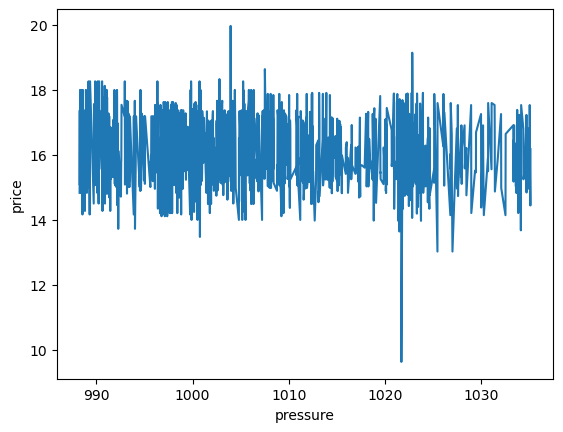

In [85]:
sns.lineplot(data=cabWeather, x="pressure", y="price", estimator="mean", ci=None)

<AxesSubplot:xlabel='humidity', ylabel='price'>

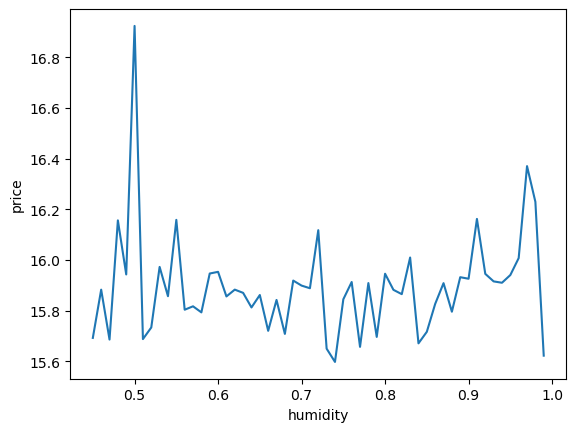

In [86]:
sns.lineplot(data=cabWeather, x="humidity", y="price", estimator="mean", ci=None)

<AxesSubplot:xlabel='wind', ylabel='price'>

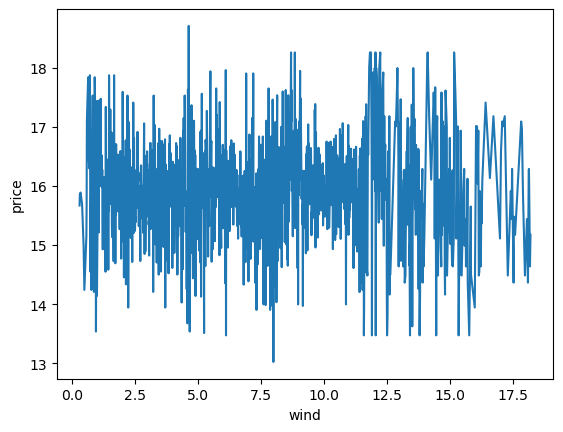

In [87]:
sns.lineplot(data=cabWeather, x="wind", y="price", estimator="mean", ci=None)

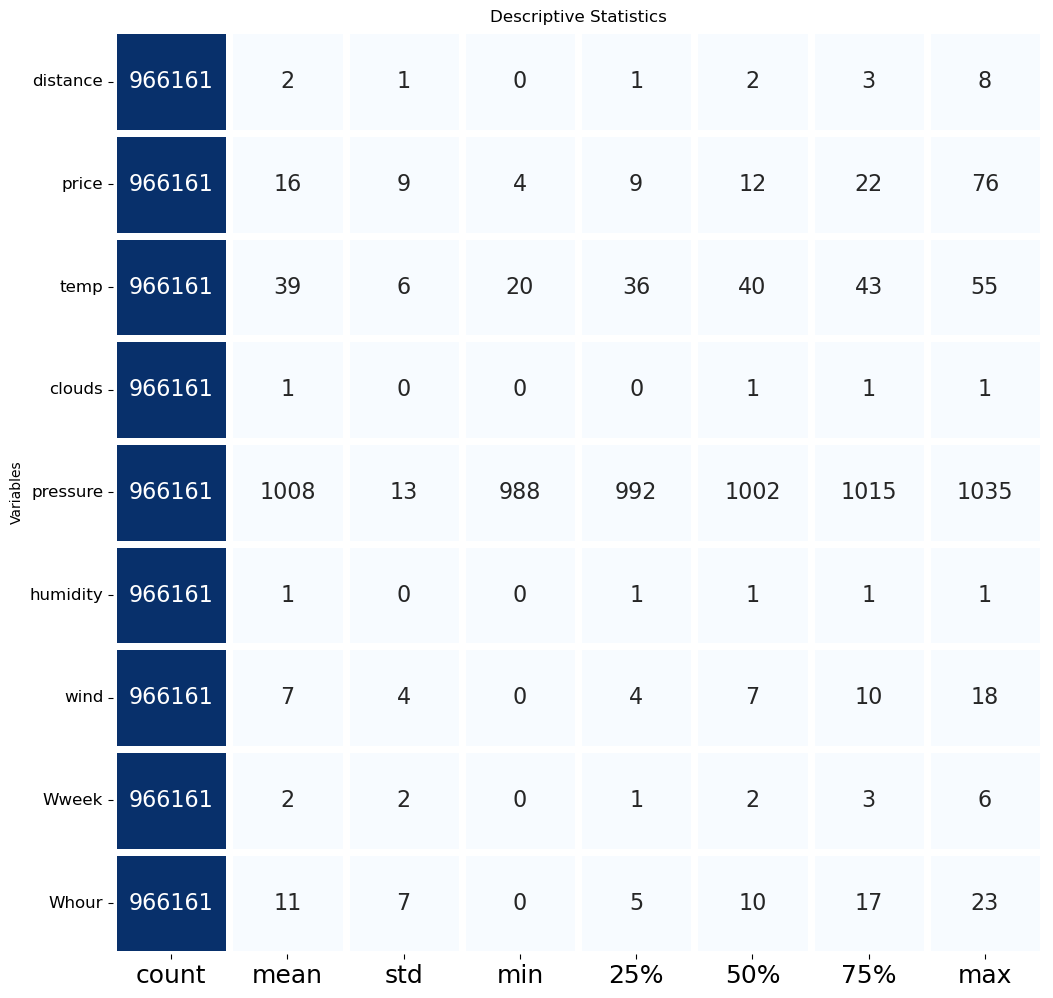

In [58]:
desc = cabWeather.describe().T
df1 = pd.DataFrame(index=['distance', 'price',
                          'temp', 'clouds', 'pressure', 'humidity', 'wind', 
                           'Wweek', 'Whour'], 
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

f,ax = plt.subplots(figsize=(12,12))

sns.heatmap(df1, annot=True,cmap = "Blues", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 12)
plt.show()

In [59]:
cabWeather.columns

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'datetime',
       'Udate', 'temp', 'location', 'clouds', 'pressure', 'time_stamp_y',
       'humidity', 'wind', 'date_time', 'Wdate', 'Wweek', 'Whour'],
      dtype='object')

In [60]:
# Removed unwanted columns which have repeted values and columns which have all distinct values for modelling
cabMod = cabWeather.drop(['cab_type','time_stamp_x','id','product_id','datetime','Udate','time_stamp_y','date_time'], axis=1)

In [61]:
cabMod

,distance,destination,source,price,surge_multiplier,name,temp,location,clouds,pressure,humidity,wind,Wdate,Wweek,Whour
0,0.55,South Station,Theatre District,27.5,1.0,Black SUV,45.889999,South Station,0.04,1003.200012,0.60,7.75,2018-12-04,1,1
1,0.55,South Station,Theatre District,27.5,1.0,Black SUV,45.070000,South Station,0.25,1003.169983,0.62,8.44,2018-12-04,1,2
2,0.55,South Station,Theatre District,27.5,1.0,Black SUV,39.869999,South Station,0.56,1004.450012,0.64,8.21,2018-12-04,1,5
3,0.55,South Station,Theatre District,27.5,1.0,Black SUV,44.029999,South Station,0.53,1003.150024,0.62,7.36,2018-12-04,1,3
4,0.55,South Station,Theatre District,27.5,1.0,Black SUV,41.849998,South Station,0.52,1003.929993,0.63,8.05,2018-12-04,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966156,2.62,Boston University,Theatre District,21.5,1.0,Black,30.889999,Boston University,0.21,1022.820007,0.56,5.42,2018-12-09,6,23
966157,1.39,Boston University,Back Bay,15.0,1.0,Black,30.860001,Boston University,0.21,1022.809998,0.57,5.44,2018-12-09,6,23
966158,1.39,Boston University,Back Bay,15.0,1.0,Black,30.889999,Boston University,0.21,1022.820007,0.56,5.42,2018-12-09,6,23
966159,5.70,Boston University,Financial District,14.0,1.0,UberPool,30.860001,Boston University,0.21,1022.809998,0.57,5.44,2018-12-09,6,23


In [88]:
# Encode data by remapping it to numeric values so its easier for the model to process and be more efficient
le = LabelEncoder()
cabMod.destination = le.fit_transform(cabMod.destination)

cabMod.source = le.fit_transform(cabMod.source)

cabMod.name = le.fit_transform(cabMod.name)

cabMod.location = le.fit_transform(cabMod.location)

cabMod.Wdate = le.fit_transform(cabMod.Wdate)

cabMod.price = le.fit_transform(cabMod.price)

In [89]:
cabMod

,distance,destination,source,price,surge_multiplier,name,temp,location,clouds,pressure,humidity,wind,Wdate,Wweek,Whour
0,0.55,9,10,46,1.0,1,45.889999,9,0.04,1003.200012,0.60,7.75,8,1,1
1,0.55,9,10,46,1.0,1,45.070000,9,0.25,1003.169983,0.62,8.44,8,1,2
2,0.55,9,10,46,1.0,1,39.869999,9,0.56,1004.450012,0.64,8.21,8,1,5
3,0.55,9,10,46,1.0,1,44.029999,9,0.53,1003.150024,0.62,7.36,8,1,3
4,0.55,9,10,46,1.0,1,41.849998,9,0.52,1003.929993,0.63,8.05,8,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966156,2.62,2,10,34,1.0,0,30.889999,2,0.21,1022.820007,0.56,5.42,9,6,23
966157,1.39,2,0,21,1.0,0,30.860001,2,0.21,1022.809998,0.57,5.44,9,6,23
966158,1.39,2,0,21,1.0,0,30.889999,2,0.21,1022.820007,0.56,5.42,9,6,23
966159,5.70,2,4,19,1.0,2,30.860001,2,0.21,1022.809998,0.57,5.44,9,6,23


<center><b><font size="3"><div style="background: linear-gradient(to right, white, black); padding: 10px;">Model Building</center></b></font></div>

In [90]:
# Seperate the dependent variable from the independent variables
X = cabMod.drop('price',axis=1)
Y = cabMod['price']
#X=cabWeather[['distance','temp','clouds','humidity','pressure','day','hour','rain', 'surge_multiplier']]
#Y=cabWeather['price']

<b>Separating data into Training and Testing in the ratio 70:30 respectively</b>

In [91]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33,random_state=12345)

In [92]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [93]:
pred=model.predict(X_test)

In [94]:
data=pd.DataFrame({'Actual Data': Y_test, 'Prediction Data': pred})

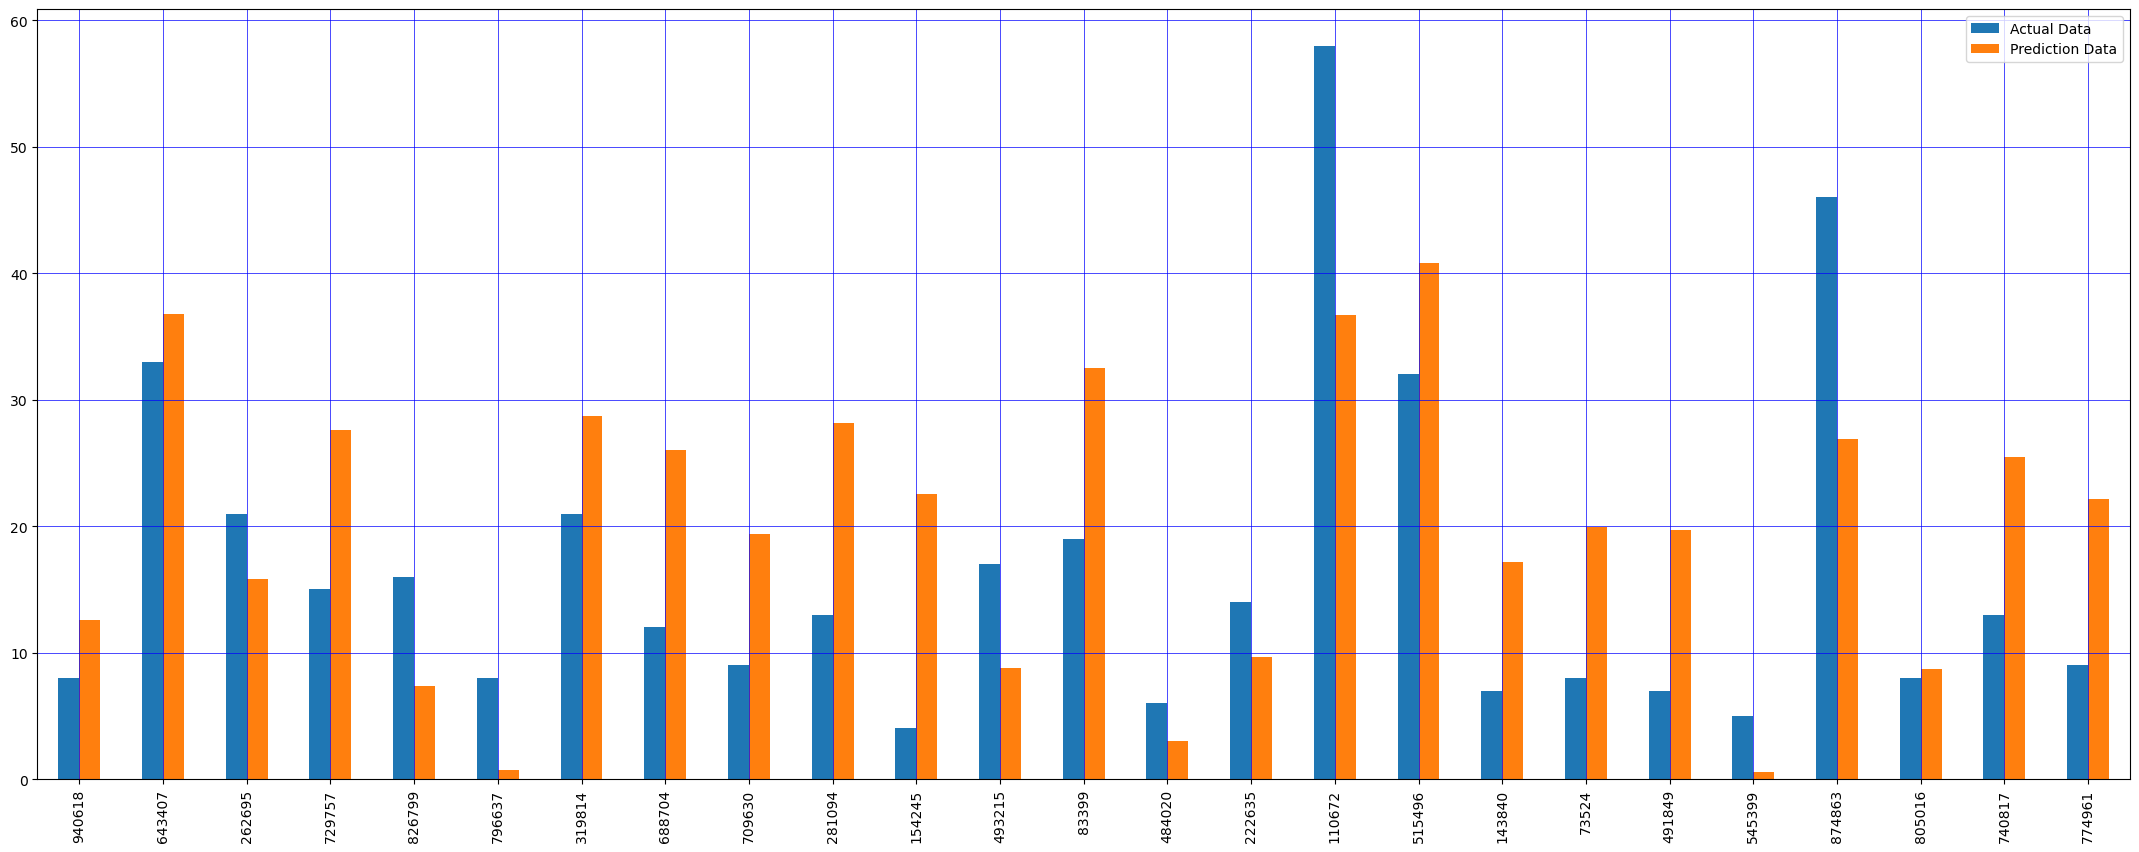

In [95]:
data1=data.head(25)
data1.plot(kind='bar',figsize=(27,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='blue')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [96]:
# instantiate the model
reg = LinearRegression()

# call cross_val_score
cv_results = cross_val_score(reg, X_train, Y_train, cv=5)

print(f'Scores: {np.round(cv_results, 3)}')
print(f'Scores mean: {np.round(np.mean(cv_results), 3)}')

Scores: [0.422 0.423 0.426 0.422 0.424]
Scores mean: 0.423


In [97]:
def GetModels():
    models = []
    models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,
                                             objective='binary:logistic',
                                             random_state=0,eval_metric='mlogloss')])
    models.append(['Logistic Regression',LogisticRegression(random_state=0)])
    models.append(['SVM',SVC(random_state=0)])
    models.append(['KNeigbors',KNeighborsClassifier()])
    models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
    models.append(['RandomForest',RandomForestClassifier(random_state=0)])
    models.append(['AdaBoostClassifier',AdaBoostClassifier()])
    return models

<b>Checking Errors</b>

In [98]:
error = np.sqrt(metrics.mean_absolute_error(Y_test, pred))
error

3.2696491201280073

<b><center>Regularized Regression</b></center>

<b>L2 Regularization (Ridge Regression)</b>

In [99]:
# instantiate the model
ridge = Ridge(alpha=0.1, normalize=True)

# fit the model
ridge.fit(X_train, Y_train)

# predict on the test data
ridge_pred = ridge.predict(X_test)

# get the score
rs = ridge.score(X_test, Y_test)

print(f'Ridge Score: {round(rs, 4)}')

Ridge Score: 0.4195


<b>L1 Regularization (Lasso Regression)</b>

In [100]:
# instantiate the regressor
lasso = Lasso(alpha=0.1, normalize=True)

# fit the model
lasso.fit(X_train, Y_train)

# predict on the test data
lasso_pred = lasso.predict(X_test)

# get the score
ls = lasso.score(X_test, Y_test)

print(f'Ridge Score: {round(ls, 4)}')

Ridge Score: -0.0


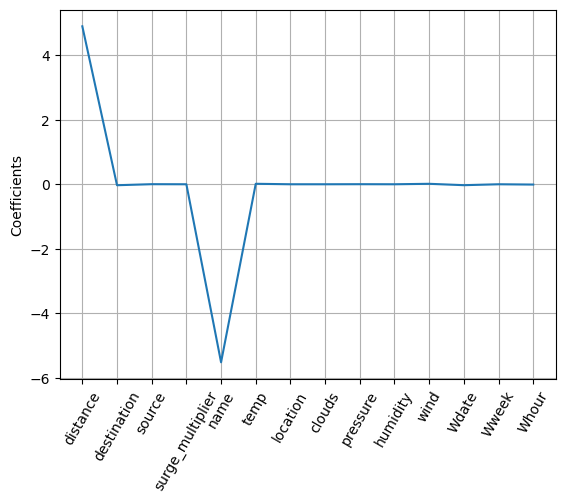

In [101]:
# Lasso Regression for Feature Selection


# store the feature names
names = X_train.columns

# instantiate the regressor
lasso = Lasso(alpha=0.1)

# extract and store the coef attribute
lasso_coef = lasso.fit(X, Y).coef_

plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.grid()
plt.show()

In [102]:
def display_plot(cv_scores, cv_scores_std, alpha_space):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores, label='CV Scores')

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, color='violet', alpha=0.2, label='CV Score ± std error')
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5', label='Max CV Score')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

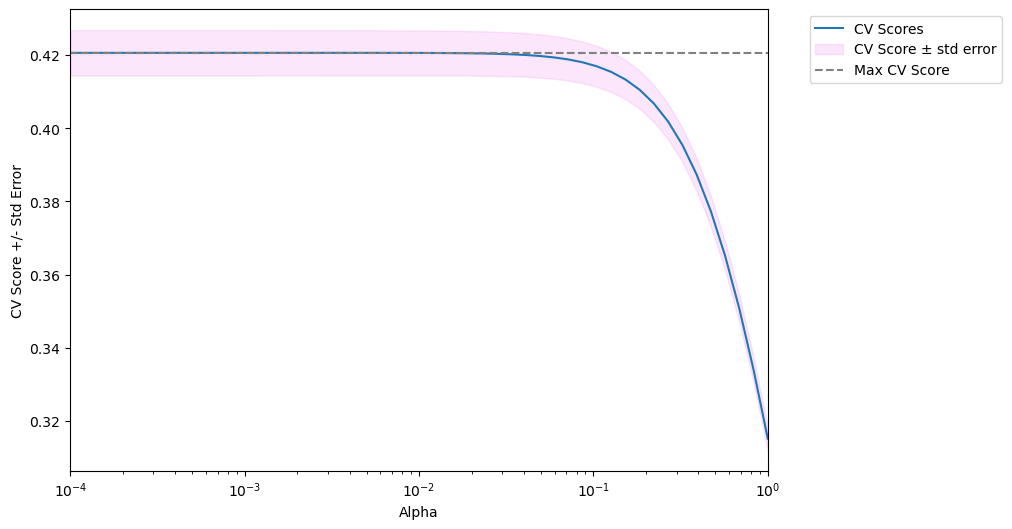

In [103]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, Y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std, alpha_space)

<b>Fine Tuning Model</b>

In [104]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=8)


# fit the training data
knn.fit(X_train, Y_train)

# predict the labels fo the test set
Y_pred = knn.predict(X_test)

# confusion_matrix
print(f'Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred)}\n')

# classification report
print(f'Classification Report: \n{classification_report(Y_test, Y_pred)}')

Confusion Matrix:
[[271   0  58 ...   0   0   0]
 [ 14   1   7 ...   0   0   0]
 [105   3 899 ...   0   0   0]
 ...
 [  0   0   0 ...  16   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   0]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.37      0.60      0.46       452
           1       0.02      0.02      0.02        59
           2       0.29      0.40      0.34      2228
           3       0.12      0.07      0.09       778
           4       0.21      0.28      0.24      5544
           5       0.38      0.56      0.46     15563
           6       0.26      0.37      0.30     16191
           7       0.21      0.23      0.22     13505
           8       0.24      0.29      0.26     16549
           9       0.23      0.27      0.25     11442
          10       0.30      0.40      0.34     21844
          11       0.26      0.29      0.27      6961
          12       0.31      0.38      0.34     19313
        

<b>Saving Model</b>

In [105]:
from joblib import dump, load
dump(model, 'Ola_Project.joblib')

['Ola_Project.joblib']